## Aprendizado não supervisionado
### Aplicação do algorithm KMeans para clusterização de dados

In [131]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [132]:
input_file = 'train.csv'
columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 
           'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 
           'n_cores', 'pc', 'px_height', 'px_width', 'ram', 
           'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 
           'wifi', 'price_range', 'id']

# Load the data
df = pd.read_csv(input_file)

<AxesSubplot:xlabel='battery_power', ylabel='ram'>

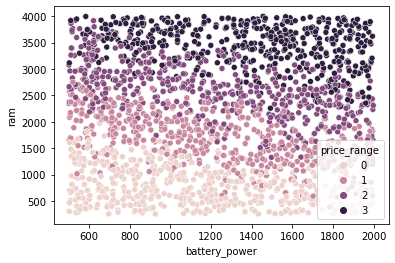

In [133]:
sns.scatterplot(x='battery_power', y='ram', hue='price_range', data=df)

In [134]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

In [135]:
# normalizing min max
# x_train = preprocessing.normalize(df)
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
target = 'price_range'
x = df.loc[:, features].values
y = df.loc[:, target].values

x_minmax = MinMaxScaler().fit_transform(x)
normalized_minmax = pd.DataFrame(x_minmax, columns = features)
normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis = 1)


In [136]:
def plot_samples(projected, labels, title):    
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(title)
    plt.show()

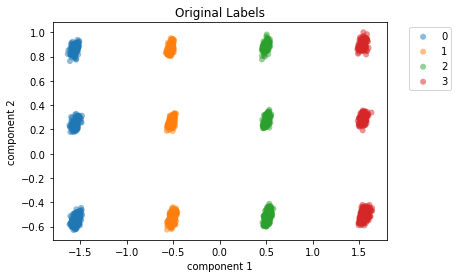

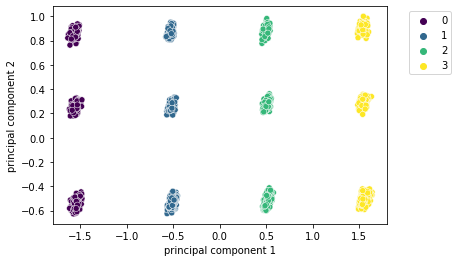

In [137]:
# PCA implementation
# Assuming 'x' is your feature set and 'df' is your original DataFrame
# Normalize the data
x_minmax = MinMaxScaler().fit_transform(x)
normalized_minmax = pd.DataFrame(x_minmax, columns=features)
normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis=1)

# Perform PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_minmax)

plot_samples(principalComponents, y, 'Original Labels')

# Create a DataFrame with the principal components
principal_breast_Df = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Add the target variable to the principal component DataFrame
principal_breast_Df[target] = df[target].values

# Plot the scatter plot
sns.scatterplot(x='principal component 1', y='principal component 2', hue=target, data=principal_breast_Df, palette='viridis')

# Ajustar a posição da legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [138]:
# k_clusters = range(0, 3)
k_clusters = 12
# k-centroids
kmeans = KMeans(n_clusters=k_clusters, random_state=0, n_init=1).fit(normalized_minmax)

#calculate the similarity between the centroids and the problems objects
centroids = kmeans.cluster_centers_
similarity = []
for i in range(k_clusters):
    similarity.append(centroids[i].dot(centroids[i]))
print("The similarity between the centroids and the problems objects is: ", similarity)

# TODO: calculate PCA 2 Components and substitute the x and y axis





The similarity between the centroids and the problems objects is:  [7.130247219729263, 14.723561314993631, 5.323079750343245, 3.643916474119001, 9.987001659121432, 9.161249574083989, 4.881884328760222, 4.584744670464637, 16.061685438507975, 6.015733858766632, 10.882086901046018, 10.506008407711592]


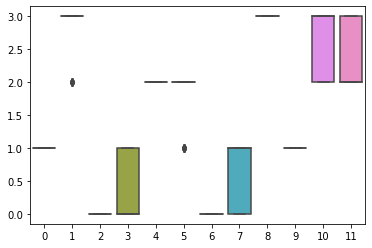

<AxesSubplot:>

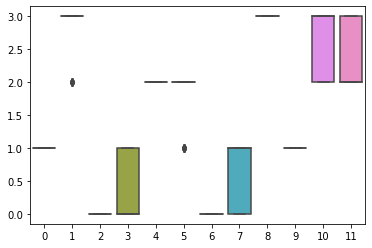

In [139]:
#TODO: plot the boxplot
sns.boxplot(x=kmeans.labels_, y=y, data=normalized_minmax)
plt.show()
sns.boxplot(x=kmeans.labels_, y=y, data=principal_breast_Df)


In [140]:

# calculate the silhouette score
silhouette_avg = silhouette_score(normalized_minmax, kmeans.labels_, metric='euclidean')
print("The average silhouette_score is :", silhouette_avg)

# Add the cluster labels to the dataframe
df['cluster'] = kmeans.labels_

The average silhouette_score is : 0.08389253796245282


In [141]:
k_clusters_range = range(0, k_clusters)  # Start from 1 to 2, resulting in 2 to 3 clusters
fits = []
scores = []

for k in k_clusters_range:
    kmeans = KMeans(n_clusters=k+1, random_state=0, n_init=1).fit(normalized_minmax)
    fits.append(kmeans)
    labels = kmeans.labels_
    if len(set(labels)) > 1:  # Check if we have more than one cluster
        score = silhouette_score(normalized_minmax, labels, metric='euclidean')
        scores.append(score)
    else:
        scores.append(None)  # Or handle the case where there's only one cluster in some other way

# Printing scores to verify output
for idx, sc in enumerate(scores):
    print(f"Silhouette score for {idx+1} clusters: {sc}")
print(fits)


c:\Users\raulp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


Silhouette score for 1 clusters: None
Silhouette score for 2 clusters: 0.2329661137625949
Silhouette score for 3 clusters: 0.11723422618166422
Silhouette score for 4 clusters: 0.09882409814817103
Silhouette score for 5 clusters: 0.0897801674627657
Silhouette score for 6 clusters: 0.08212338390491283
Silhouette score for 7 clusters: 0.08503914724679064
Silhouette score for 8 clusters: 0.07007002241893646
Silhouette score for 9 clusters: 0.08019331760096006
Silhouette score for 10 clusters: 0.07601699190743198
Silhouette score for 11 clusters: 0.08851847662943034
Silhouette score for 12 clusters: 0.08389253796245282
[KMeans(n_clusters=1, n_init=1, random_state=0), KMeans(n_clusters=2, n_init=1, random_state=0), KMeans(n_clusters=3, n_init=1, random_state=0), KMeans(n_clusters=4, n_init=1, random_state=0), KMeans(n_clusters=5, n_init=1, random_state=0), KMeans(n_clusters=6, n_init=1, random_state=0), KMeans(n_clusters=7, n_init=1, random_state=0), KMeans(n_init=1, random_state=0), KMeans(

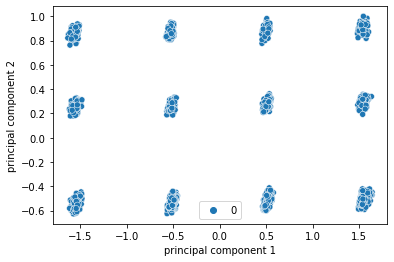

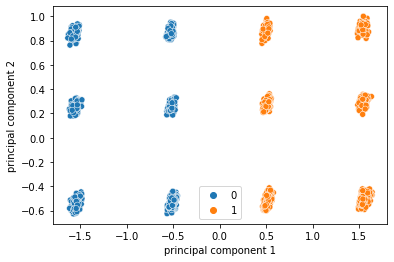

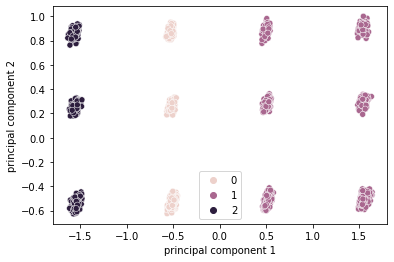

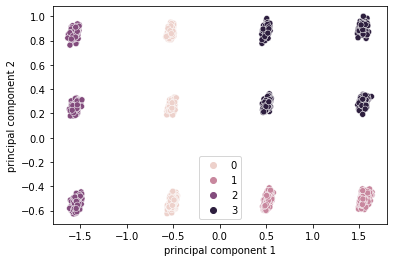

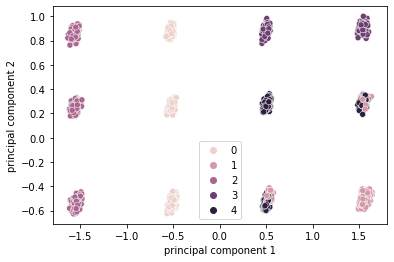

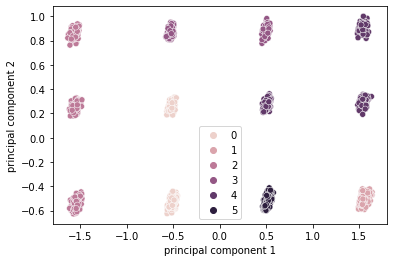

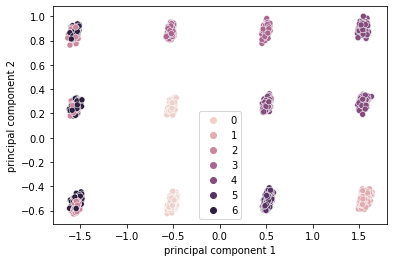

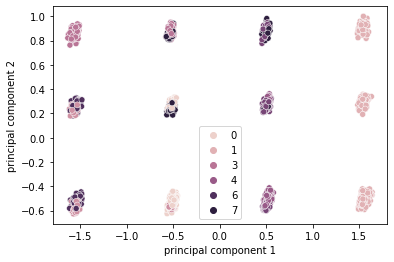

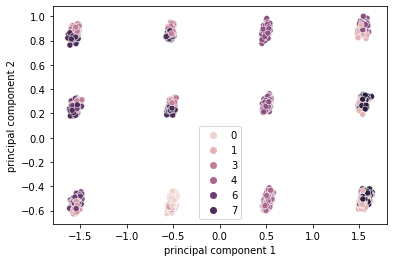

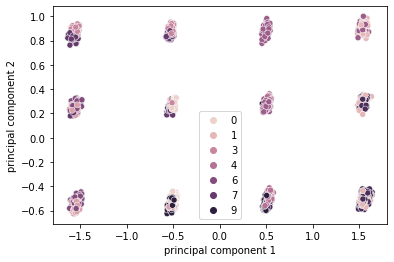

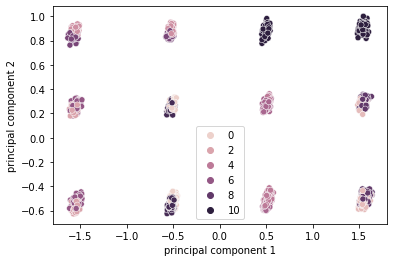

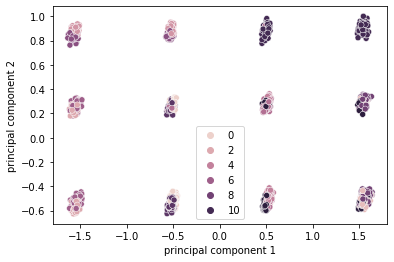

In [142]:
for i in range(0, k_clusters):
    # sns.scatterplot(data = normalized_minmax, x = 'battery_power', y = 'ram', hue = fits[i].labels_)
    sns.scatterplot(data = principal_breast_Df, x='principal component 1', y='principal component 2', hue = fits[i].labels_)
    plt.show()

<AxesSubplot:>

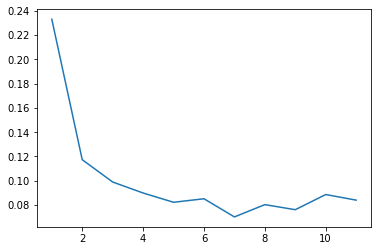

In [143]:
sns.lineplot(x = k_clusters_range, y = scores)

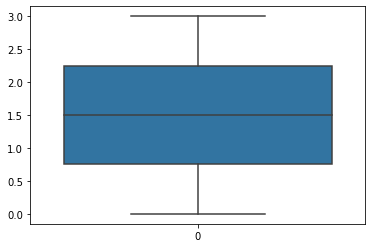

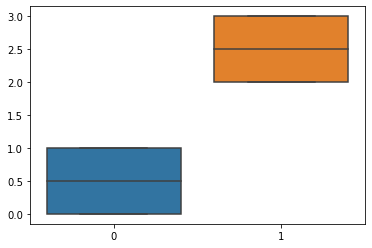

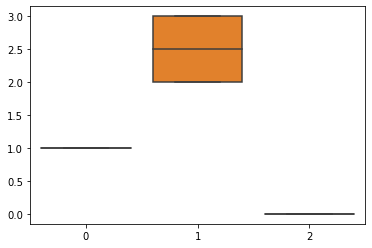

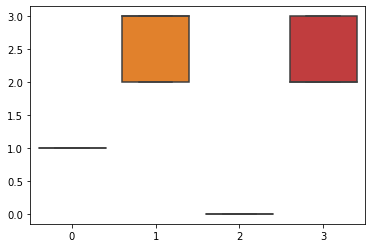

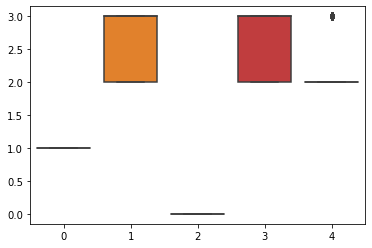

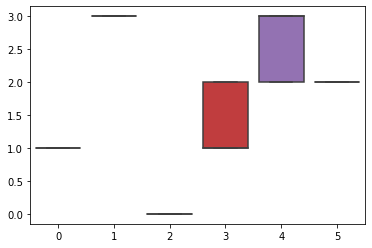

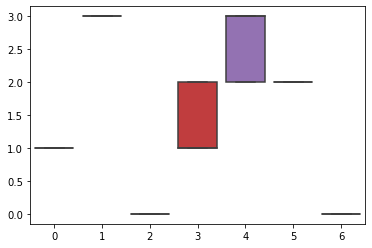

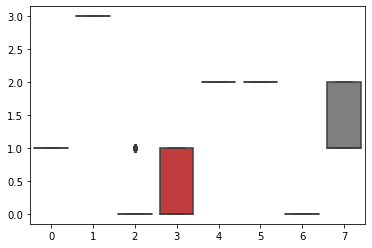

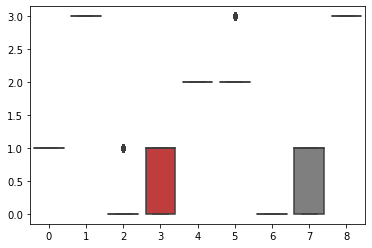

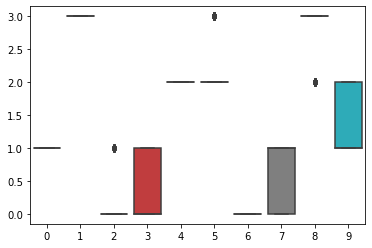

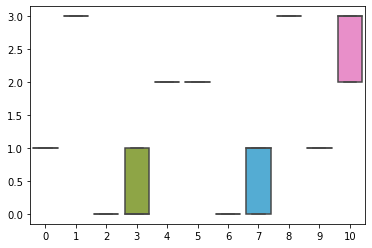

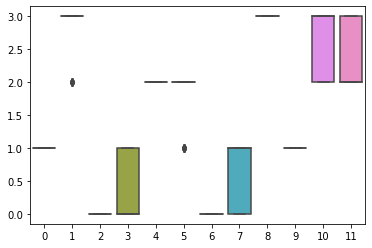

In [144]:
# os graficos sobre boxplot foram retirados devido a nossa base de dados ser para classificação e não para regressão

# for i in range (0, k_clusters):
#     sns.boxplot(x = fits[i].labels_, y = y)
#     plt.show()